# Cycle 4 Lab Exercises - Functions for Data Structures and Plotting

### Objectives:

1. To get more practice devising a data structure, and writing functions to process it
2. To make use of a library (`matplotlib`), and practice various kinds of plotting

We’ll be working with a made-up dataset containing information about the production of a fictional vegetable called a poturnip (these data are fake, but their distribution and format are the same as some real agricultural data I have worked with). On each line of the file` poturnip.csv` are four pieces of information associated with a single sale of a shipment of poturnip:

```
Price/unit,Production cost/unit,Units produced nationally in month, month,region of sale
```

### Task 0: Designing your data structure

1. Look at the file` poturnip.csv`
2. Devise your own data structure to store the information in this file, and hand-write out your plan.
    1. Write out an example of how your data structure might store the information in the first three lines of the file
3. Write a function to read the information in poturnip.csv and store the information in your data structure.  

In [1]:
# plan for data structure: a list of dictionaries so for the first line:
[{'price': 31.2, 'cost': 27.8, 'monthlyProduction': 32889042, 'month': 2, 'region': 'Ashire'}]

def readData(filename):
  myList = []
  try: 
    for line in open(filename):
      split = line.strip().split(',')
      price = float(split[0])
      cost = float(split[1])
      monthlyProd = int(split[2])
      month = int(split[3])
      region = split[4]
      record = {'price': price, 'cost': cost, 'monthlyProduction': monthlyProd, 'month': month, 'region': region}
      myList.append(record)
    return myList
  except TypeError:
    print('Incorrect type detected ')
    return myList
  except: 
     print ('unable to parse line ' + line)
     return myList
    #  They are likely to have lots of different solutions here for error checking

### Task 1: Breaking your own code
Now a bit of fun - try to break your file reading function!  Add a line to `poturnip.csv` that causes your reading function to throw a runtime exception.  Now, add some error-checking or an exception to your function that deals with it.

### Task 2 - Writing functions to manipulate your data structure

Write several functions to deal with information stored in your data structure:

1. Write a function `filterByRegion(dataStruct, regionString)` that takes your data structure and a string specifying a region as parameters, and returns a new data structure containing only the information for sales from the region specified by `regionString`.
2. Write a function `filterByMonth(dataStruct, month)` that takes your data structure and an argument specifying the month as parameters, and returns a new data structure containing only the information for sales from the month specified.
3. Write a function` getPricesPerUnit(dataStruct)` that takes your data structure, and returns a list of the prices/unit stored in that data structure (the first column in the file).
4. Write a function` getCostsPerUnit(dataStruct)` that takes your data structure, and returns a list of the production cost/unit stored in that data structure (the second column in the file).
5. Write a function `calculateProfitPerUnit(dataStruct)` that takes your data structure, and returns a list of the profits for the sales (the difference between the price paid and the costs).

In [2]:
def filterByRegion(dataStruct, regionString):
  newList = []
  for record in dataStruct:
    if record['region'] == regionString:
      newList.append(record)
  return newList

def filterByMonth(dataStruct, month):
  newList = []
  for record in dataStruct:
    if record['month'] == month:
      newList.append(record)
  return newList


def getPricesPerUnit(dataStruct):
  listOfPrices = []
  for record in dataStruct:
    listOfPrices.append(record['price'])
  return listOfPrices


def getCostsPerUnit(dataStruct):
  listOfCosts = []
  for record in dataStruct:
    listOfCosts.append(record['cost'])
  return listOfCosts

def getTotalProduction(dataStruct):
  listOfProd = []
  for record in dataStruct:
    listOfProd.append(record['monthlyProduction'])
  return listOfProd


def calculateProfitPerUnit(dataStruct):
  listOfProfits = []
  for record in dataStruct:
    listOfProfits.append(record['price'] - record['cost'])
  return listOfProfits

### Task 3 - Extracting information and plotting

Use the functions you wrote as part of Task 2 and any additional bits of code you need to produce a series of plots of your data using `matplotlib`

1. Produce a scatterplot of the price paid per unit vs the cost of production per unit overall.  
2. Produce a scatterplot of the price paid per unit vs the total production in the month of sale
3. Produce histograms of the profit/unit for each region.  

[31.2, 38.4, 38.3]
[27.8, 31.7, 30.1]
[3.3999999999999986, 6.699999999999999, 8.199999999999996]
[{'price': 38.4, 'cost': 31.7, 'monthlyProduction': 32889042, 'month': 2, 'region': 'Cshire'}, {'price': 38.3, 'cost': 30.1, 'monthlyProduction': 32889042, 'month': 2, 'region': 'Cshire'}]


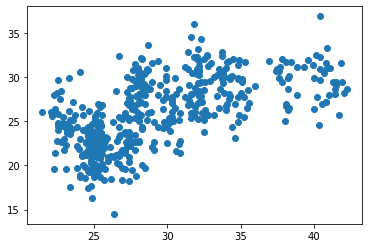

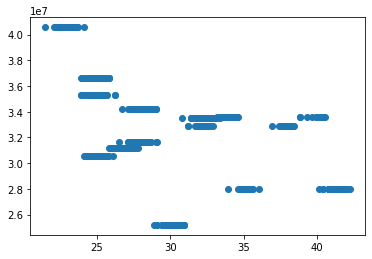

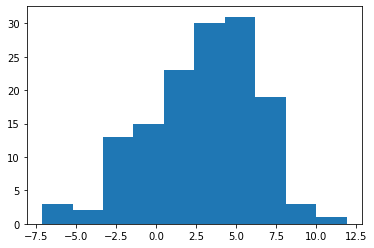

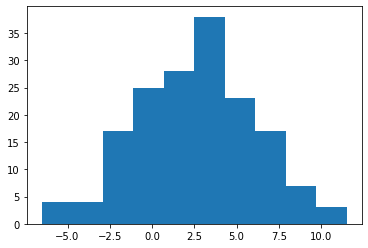

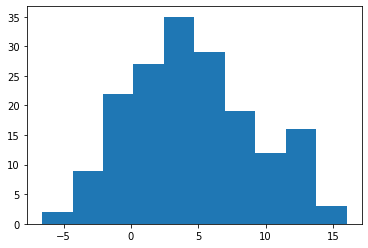

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt


def filterByRegion(dataStruct, regionString):
  newList = []
  for record in dataStruct:
    if record['region'] == regionString:
      newList.append(record)
  return newList

def filterByMonth(dataStruct, month):
  newList = []
  for record in dataStruct:
    if record['month'] == month:
      newList.append(record)
  return newList


def getPricesPerUnit(dataStruct):
  listOfPrices = []
  for record in dataStruct:
    listOfPrices.append(record['price'])
  return listOfPrices


def getCostsPerUnit(dataStruct):
  listOfCosts = []
  for record in dataStruct:
    listOfCosts.append(record['cost'])
  return listOfCosts

def getTotalProduction(dataStruct):
  listOfProd = []
  for record in dataStruct:
    listOfProd.append(record['monthlyProduction'])
  return listOfProd


def calculateProfitPerUnit(dataStruct):
  listOfProfits = []
  for record in dataStruct:
    listOfProfits.append(record['price'] - record['cost'])
  return listOfProfits


dataStruct = readData('poturnip.csv')
print(getPricesPerUnit(dataStruct[:3]))
print(getCostsPerUnit(dataStruct[:3]))
print(calculateProfitPerUnit(dataStruct[:3]))

# print(filterByMonth(dataStruct, 10))
print(filterByRegion(dataStruct[:3], 'Cshire'))

plt.scatter(getPricesPerUnit(dataStruct), getCostsPerUnit(dataStruct))
plt.show()
plt.clf()
plt.scatter(getPricesPerUnit(dataStruct), getTotalProduction(dataStruct))
plt.show()
plt.clf()
justAProfit = calculateProfitPerUnit(filterByRegion(dataStruct, 'Ashire'))
plt.hist(justAProfit)
plt.show()
plt.clf()

justBProfit = calculateProfitPerUnit(filterByRegion(dataStruct, 'Bshire'))
plt.hist(justBProfit)
plt.show()
plt.clf()

justCProfit = calculateProfitPerUnit(filterByRegion(dataStruct, 'Cshire'))
plt.hist(justCProfit)
plt.show()
plt.clf()

 # Some of this plotting could sensibly be placed in functions!

### Task 4 - Stretch Exercise

We could group the months into seasons, with months 12, 1, 2 as winter, 3, 4, 5 as spring, 6, 7, 8 as summer, and 9, 10, 11 as autumn.  Write code to produce new data structures with data selected in this way, and produce box-plots for profits in each region in each season.  Can you see any difference between the seasons and regions?

In [13]:
seasonDict = {'winter': [12, 1, 2], 'spring': [3, 4, 5], 'summer': [6, 7, 8], 'autumn': [9, 10, 11]}

def selectOnSeason(listOfMonths, dataStruct):
  newList = []
  for record in dataStruct:
    if record['month'] in listOfMonths:
      newList.append(record)
  return newList

# a more general solution would be to get this list be traversing the data 
regions = {'Ashire', 'Bshire', 'Cshire'}

for region in regions:
  for season in seasonDict:
    subselected = selectOnSeason(seasonDict[season], filterByRegion(dataStruct, region))
#     displaying instead of saving is perfectly fine
    plt.boxplot(calculateProfitPerUnit(subselected))
    plt.savefig(str(region) + "_" + str(season) + ".pdf")
    plt.clf()
#

<Figure size 432x288 with 0 Axes>